#### Import Libraries

In [100]:
# Numerical libraries
import numpy as np   
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
# to handle data in form of rows and columns 
import pandas as pd    
# importing ploting libraries
import matplotlib.pyplot as plt   
%matplotlib inline 
#importing seaborn for statistical plots
import seaborn as sns
from sklearn import metrics
import pandas as pd

#### Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data.

In [101]:
bank = pd.read_excel("Credit Card Customer Data.xlsx")
bank.head(5)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [102]:
bank.shape

(660, 7)

In [103]:
bank.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


We can see that the mean average_credit_limit is approx. 34500. Also everyone has atleast one credit card indicating that there are no anomalies in that particular column values. 

In [104]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [105]:
sum(bank.duplicated())

0

We can see that there are no null or dupicate values/rows that needs to be taken care of

In [106]:
bank.std() #checking for standard deviation values of each columns

Sl_No                    190.669872
Customer Key           25627.772200
Avg_Credit_Limit       37625.487804
Total_Credit_Cards         2.167835
Total_visits_bank          1.631813
Total_visits_online        2.935724
Total_calls_made           2.865317
dtype: float64

In [107]:
bank.skew()  #checking for skewness

Sl_No                  0.000000
Customer Key           0.051462
Avg_Credit_Limit       2.202396
Total_Credit_Cards     0.144879
Total_visits_bank      0.141896
Total_visits_online    2.225607
Total_calls_made       0.658905
dtype: float64

In [108]:
bank.isna().sum()  #checking in for column wise null values

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

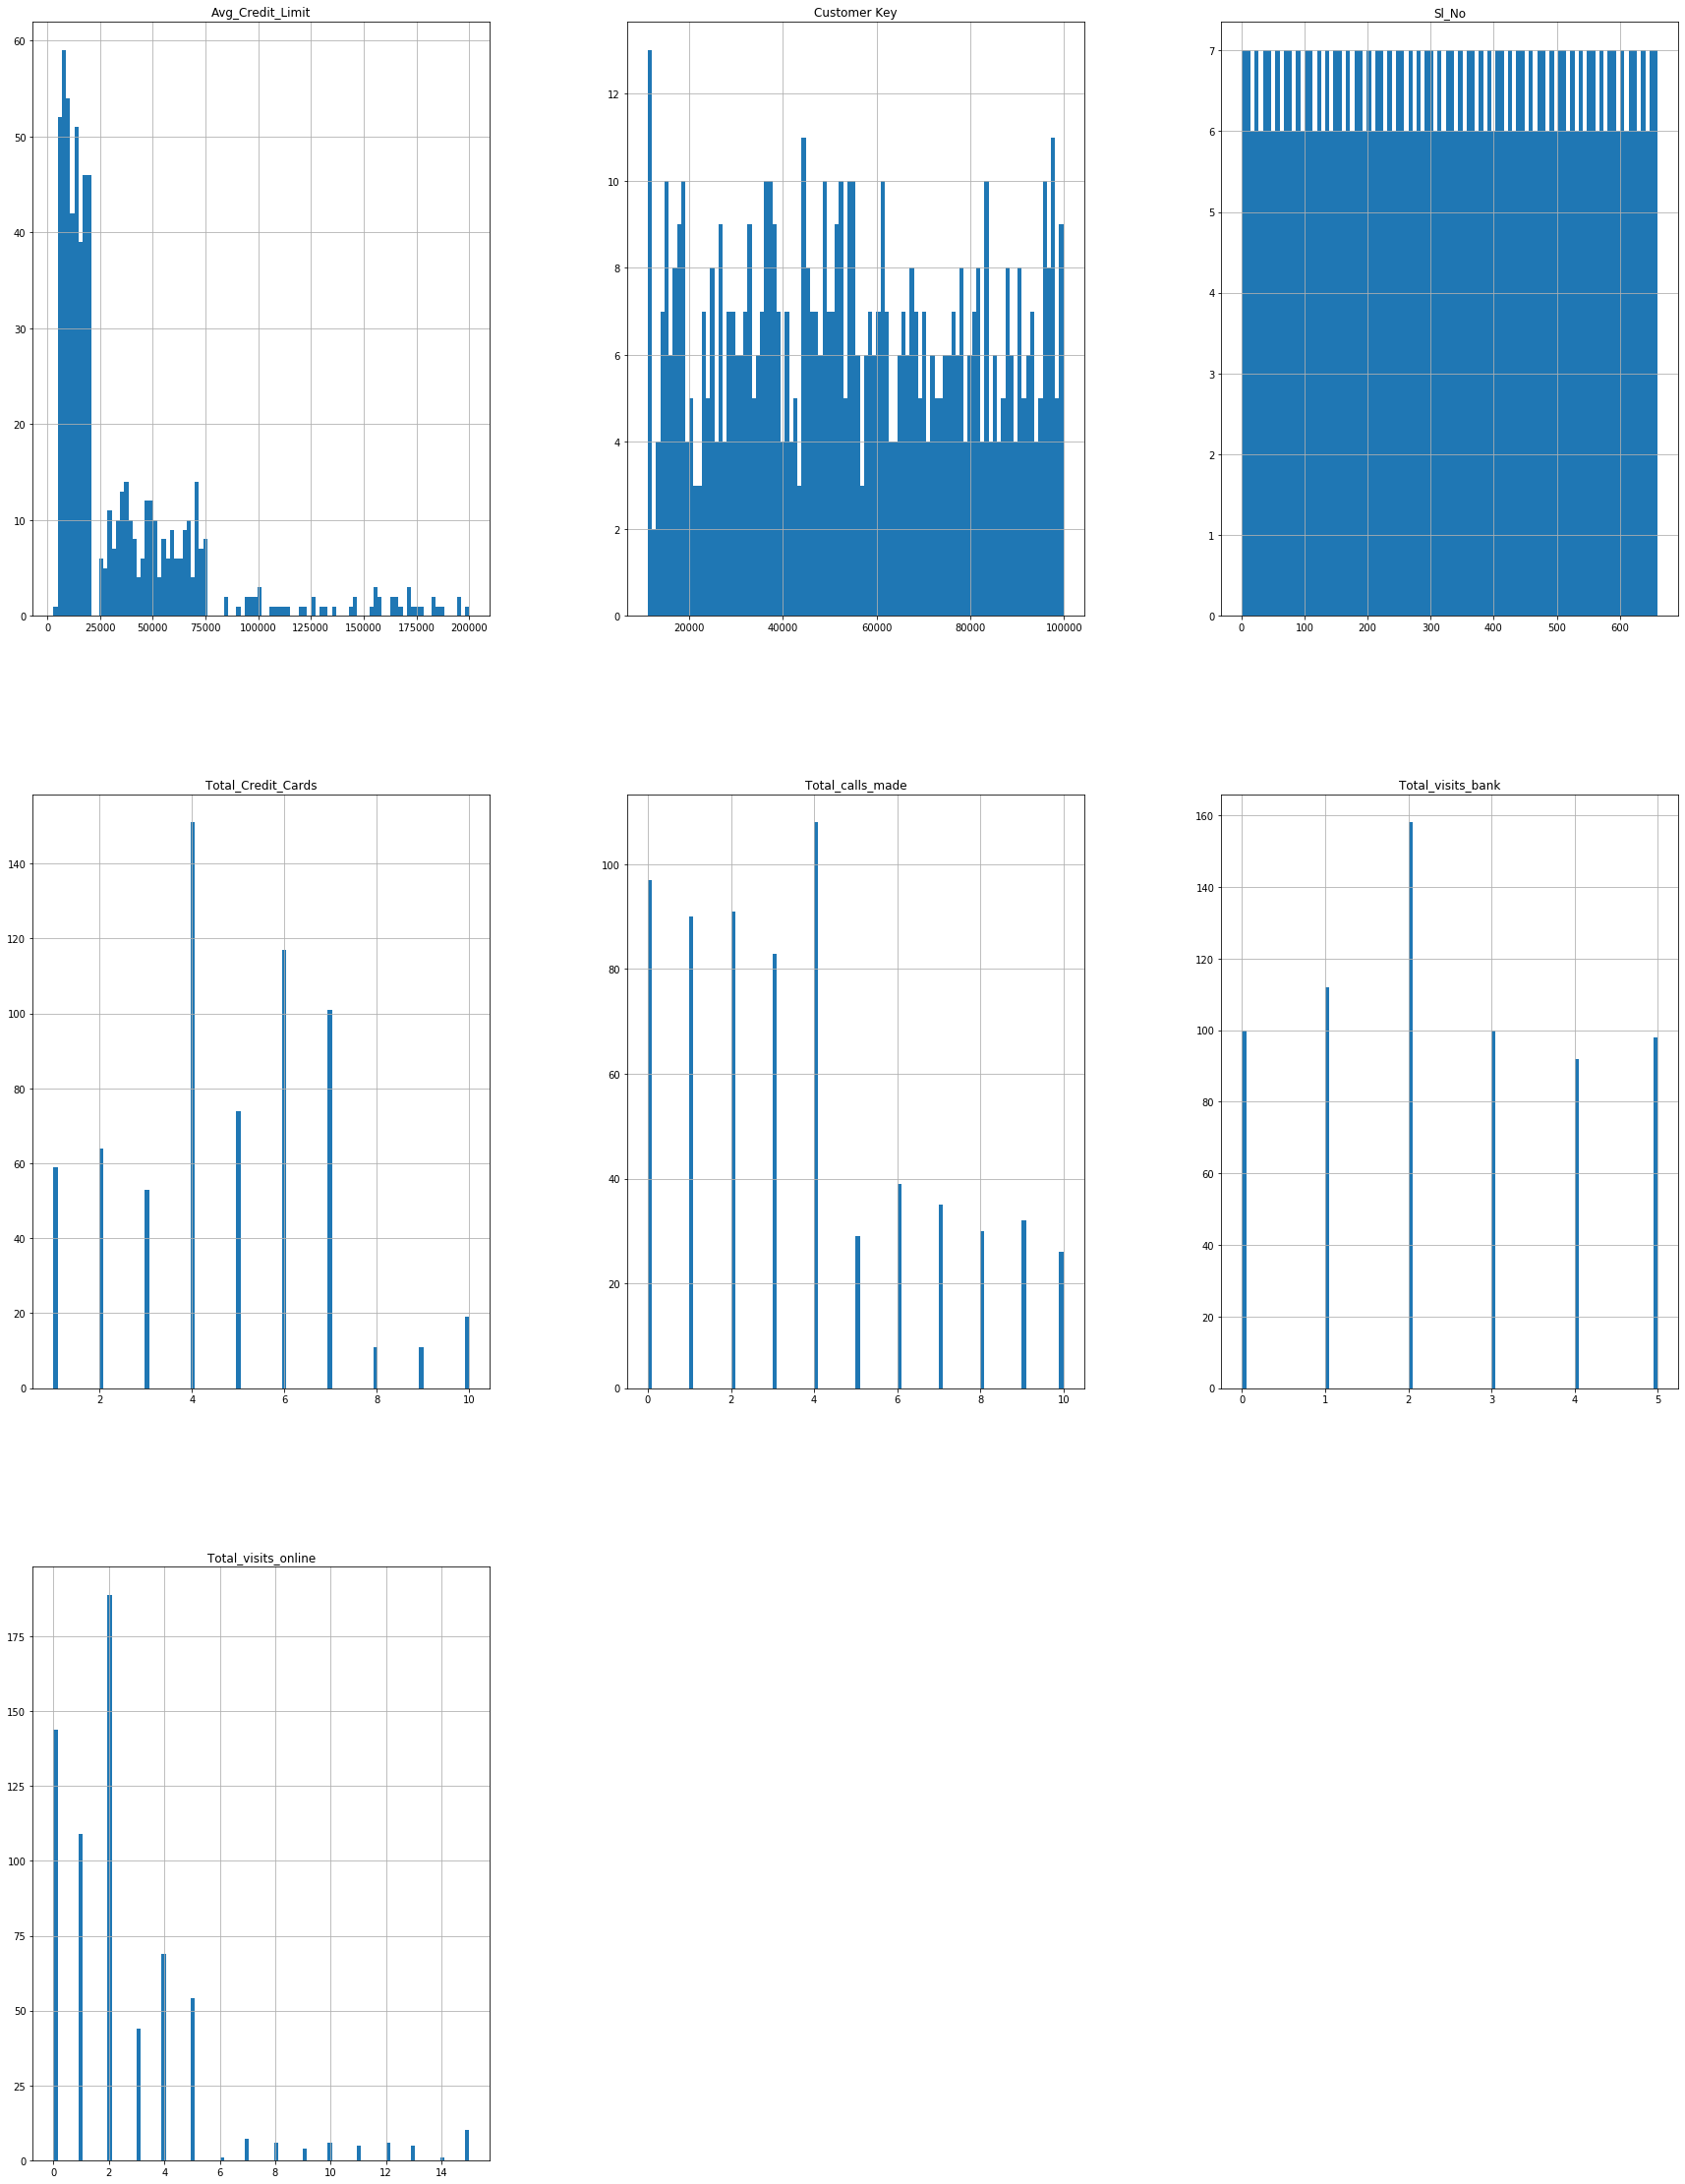

In [109]:
columns = bank.columns.tolist()
bank[columns].hist(stacked=False, bins=100, figsize=(30,40)); 
# Histogram of each column

From the above histogram there are a number of details we can analyse,
1. The average credit card limit is mainly between 3000-25000, followed by the range 25000-75000. Credit card holders having balance higher than that is comparitively lower
2. Most of them have 4 credit cards or higher(6 or 7)
3. Most of them have made 4 calls to the bank, the range lies between 1-4 calls.
4. Most of the customers have made atleast 2 visits to the bank
5. Atleast 2 online visits are being made by the majority of the customers 

In [110]:
##Remove sl_no since it is redundant
bank.drop('Sl_No', axis=1, inplace=True)

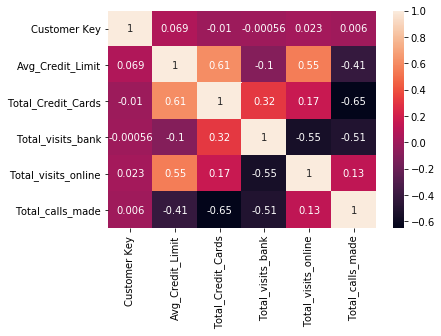

In [111]:
corr = bank.corr()
sns.heatmap(corr, annot = True)
#checking fr correlation between different attributes

We can see a high positive correlation between Total credit cards and the average credit card limit(.61). Also, avg.credit card limit and total online visits are also positively correlated(.55).
A slight correlation between credit cards and bank visits(.32) is visible. Also, between online visits and credit cards(.17) & online visits and calls made(.13) 

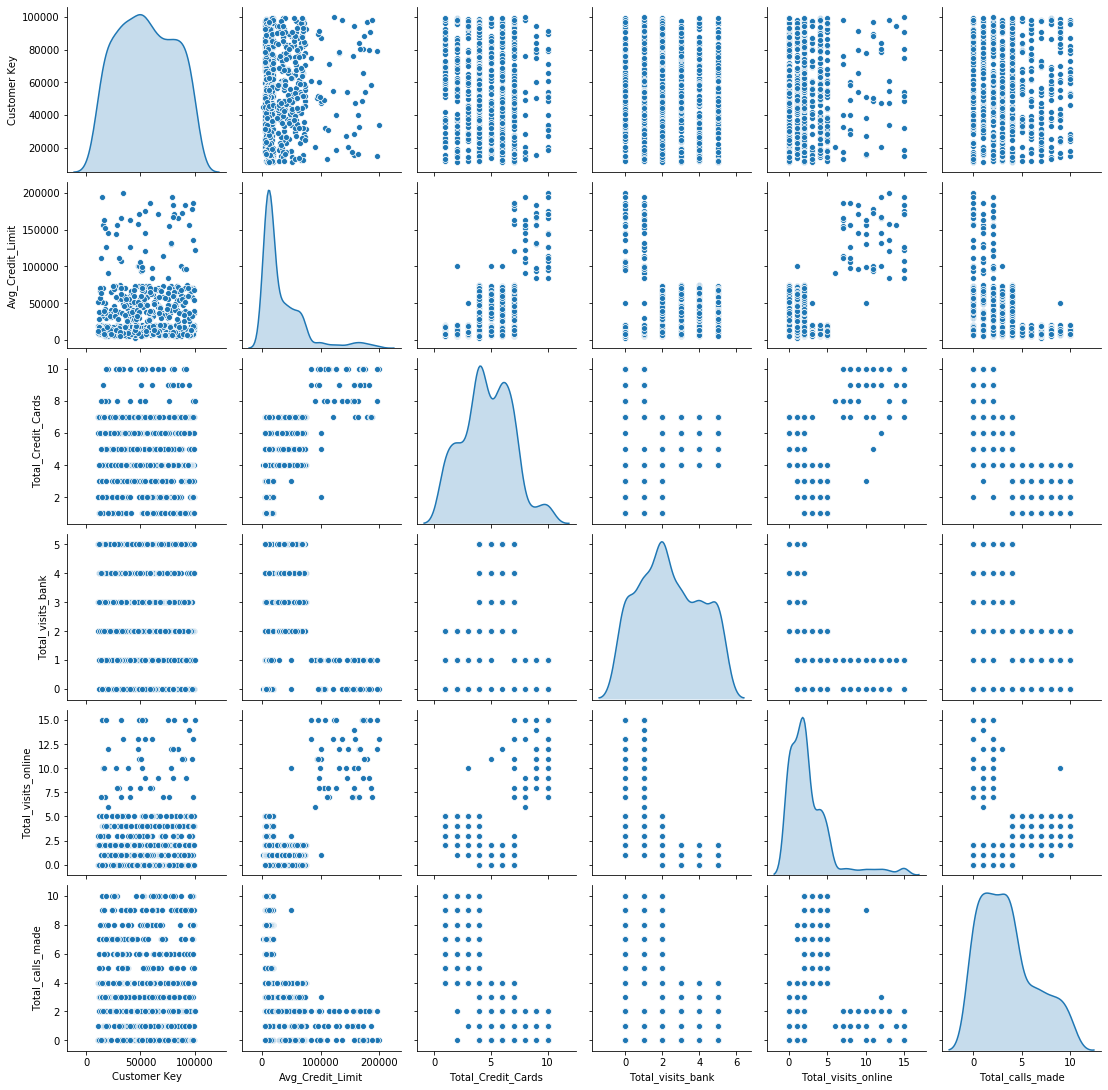

In [112]:
sns.pairplot(bank, diag_kind='kde') 

Based on the kde plots, We can see that we may work with 4 or 5 clusters.

In [113]:
##Scale the data
from scipy.stats import zscore
bankscaled =bank.apply(zscore)


#### 3. Execute K-means clustering use elbow plot and analyse clusters using boxplot 

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

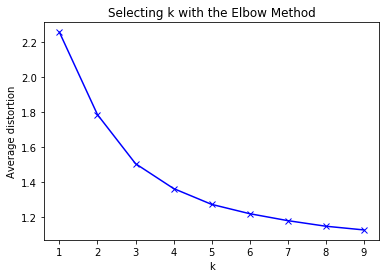

In [114]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(bankscaled)
    prediction=model.predict(bankscaled)
    meanDistortions.append(sum(np.min(cdist(bankscaled, model.cluster_centers_, 'euclidean'), axis=1)) / bankscaled
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

The curve is not very clear, thus let's take k=3 and k=5 and see

In [115]:
#Set the value of k=3
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)
kmeans.fit(bankscaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

In [116]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.00384197, -0.59579625, -1.05962278, -0.9015185 ,  0.32299678,
         1.14810882],
       [-0.01015743, -0.02106178,  0.37368962,  0.6663945 , -0.55367163,
        -0.55300488],
       [ 0.06120332,  2.83176409,  1.86222621, -1.10576269,  2.82731942,
        -0.87432983]])

In [117]:
#Calculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(bankscaled) )
print(centroid_df)

   Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0      0.003842         -0.595796           -1.059623          -0.901518   
1     -0.010157         -0.021062            0.373690           0.666395   
2      0.061203          2.831764            1.862226          -1.105763   

   Total_visits_online  Total_calls_made  
0             0.322997          1.148109  
1            -0.553672         -0.553005  
2             2.827319         -0.874330  


In [118]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')
# Joining the label dataframe with the data frame.
df_labeled = bankscaled.join(df_labels)
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. 
df_analysis

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1
1,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528,1
3,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1
4,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
...,...,...,...,...,...,...,...
655,-0.157505,1.713589,2.443892,-0.860451,2.520519,-1.251537,2
656,0.218310,1.314621,2.443892,-0.860451,3.543188,-0.553005,2
657,-0.051055,2.937092,1.520613,-0.860451,2.179629,-0.902271,2
658,0.996298,3.655235,2.443892,-0.860451,4.224968,-1.251537,2


In [119]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(bankscaled)
prediction=final_model.predict(bankscaled)

#Append the prediction 
bankscaled["GROUP"] = prediction
bank["GROUP"] = prediction
print("Groups Assigned : \n")
bank.head()

Groups Assigned : 



,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,87073,100000,2,1,1,0,1
1,38414,50000,3,0,10,9,0
2,17341,50000,7,1,3,4,1
3,40496,30000,5,1,1,4,1
4,47437,100000,6,0,12,3,2


In [120]:
#Analyze the distribution of the data among the two groups (K = 3) using boxplot.
bankClust = bank.groupby(['GROUP'])
bankClust.mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,
0,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536
1,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000
2,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BF8F194C8>,
      dtype=object)

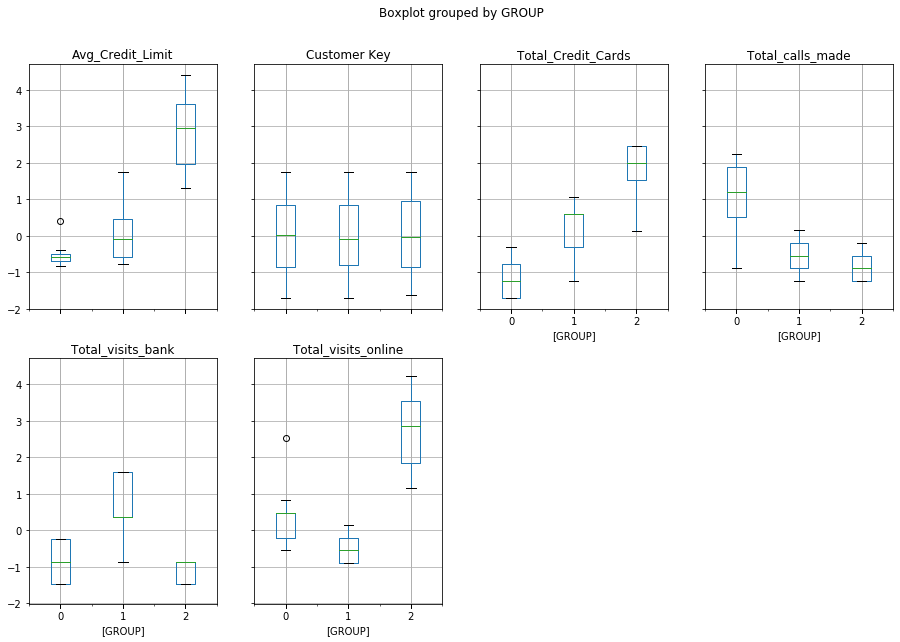

In [121]:
bankscaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

It can be seen that Avg.credit card limit is highest for group 3, followed by group 2 and group 1 having the least.
This same pattern can be seen in the case of total no.of credit cards.
Group 1 have made highest number of calls ,group 3 have made the least.
Bank visits are highest for group 2 and lowest for group 3 whereas online visits are highest for group 3 followed by group 1.

In [152]:
from array import array 
clusters3= bankscaled['GROUP']
clusters3.to_numpy()


array([0, 4, 3, 3, 2, 1, 2, 4, 1, 4, 4, 4, 1, 4, 1, 1, 1, 1, 4, 4, 4, 1,
       4, 1, 4, 1, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4,
       1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 1, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1, 1, 4, 4,
       4, 4, 4, 1, 4, 1, 1, 4, 4, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 1, 4,
       1, 1, 1, 4, 4, 4, 1, 4, 1, 1, 4, 4, 1, 1, 1, 4, 4, 1, 4, 4, 4, 1,
       4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4,
       1, 4, 4, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 1, 1, 4, 1, 1, 1, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4,
       4, 4, 1, 4, 4, 1, 4, 1, 1, 4, 4, 1, 1, 4, 1, 1, 4, 4, 4, 4, 4, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0,
       3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3,
       3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0,

#### Avg.Silhoutte Score for k-means clustering (k=3)

In [123]:
# Calculate Avg Silhoutte Score for k=3

from sklearn.metrics import silhouette_score
score= silhouette_score(bankscaled,clusters3)
score

0.4416465209051968

In [125]:
resultsDf = pd.DataFrame({'Method':['K-means clustering(k=3)'], 'score': score})
resultsDf = resultsDf[['Method', 'score']]
resultsDf

,Method,score
0,K-means clustering(k=3),0.441647


In [126]:
#  Let us next try with K = 5, the next elbow point
final_model=KMeans(5)
final_model.fit(bankscaled)
prediction=final_model.predict(bankscaled)

#Append the prediction 
bank["GROUP"] = prediction
bankscaled["GROUP"] = prediction
print("Groups Assigned : \n")
bank.head()

Groups Assigned : 



,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,87073,100000,2,1,1,0,0
1,38414,50000,3,0,10,9,4
2,17341,50000,7,1,3,4,3
3,40496,30000,5,1,1,4,3
4,47437,100000,6,0,12,3,2


In [127]:
bankClust = bank.groupby(['GROUP'])
bankClust.mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,
0,78894.833333,37597.701149,5.580460,3.505747,0.948276,1.948276
1,76995.464912,12043.859649,2.166667,0.947368,3.438596,6.938596
2,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000
3,35172.132075,30650.943396,5.462264,3.476415,1.009434,2.042453
4,32693.081818,12309.090909,2.663636,0.918182,3.672727,6.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BF7C34348>,
      dtype=object)

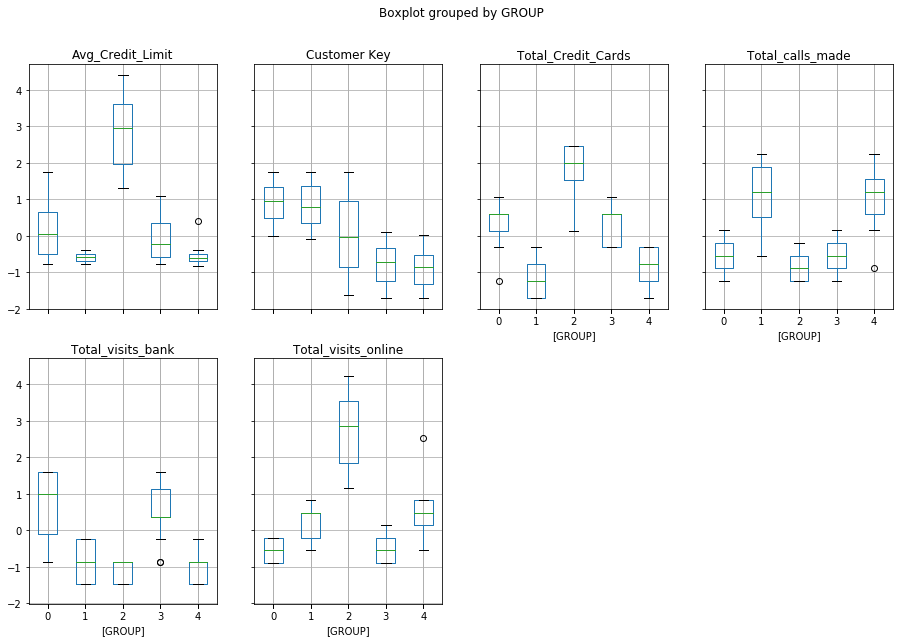

In [128]:
bankscaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [129]:
from array import array 
clusters= bankscaled['GROUP']
clusters.to_numpy()


array([0, 4, 3, 3, 2, 1, 2, 4, 1, 4, 4, 4, 1, 4, 1, 1, 1, 1, 4, 4, 4, 1,
       4, 1, 4, 1, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4,
       1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 1, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1, 1, 4, 4,
       4, 4, 4, 1, 4, 1, 1, 4, 4, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 1, 4,
       1, 1, 1, 4, 4, 4, 1, 4, 1, 1, 4, 4, 1, 1, 1, 4, 4, 1, 4, 4, 4, 1,
       4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4,
       1, 4, 4, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 1, 1, 4, 1, 1, 1, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4,
       4, 4, 1, 4, 4, 1, 4, 1, 1, 4, 4, 1, 1, 4, 1, 1, 4, 4, 4, 4, 4, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0,
       3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3,
       3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0,

#### Avg.Silhoutte Score for k-means clustering (k=5)

In [130]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
score1 = silhouette_score(bankscaled,clusters)
score1

0.4936567057479511

In [131]:
tempResultsDf = pd.DataFrame({'Method':['K-means clustering(k=5)'], 'score': score1})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,score
0,K-means clustering(k=3),0.441647
0,K-means clustering(k=5),0.493657


#### 4.Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot

In [134]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='average')
model.fit(bankscaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=5)

In [135]:
bankscaled['labels'] = model.labels_
bankscaled.head(10)


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,labels
0,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0,0
1,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859,4,2
2,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528,3,4
3,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528,3,4
4,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739,2,1
5,0.136383,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,1,3
6,-0.264423,1.740187,0.135694,-1.473731,2.861408,-0.553005,2,1
7,-0.693736,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,4,2
8,1.067955,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,1,3
9,-0.405002,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,4,2


In [136]:
bank['labels'] = model.labels_
bank.head(10)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,labels
0,87073,100000,2,1,1,0,0,0
1,38414,50000,3,0,10,9,4,2
2,17341,50000,7,1,3,4,3,4
3,40496,30000,5,1,1,4,3,4
4,47437,100000,6,0,12,3,2,1
5,58634,20000,3,0,1,8,1,3
6,48370,100000,5,0,11,2,2,1
7,37376,15000,3,0,1,1,4,2
8,82490,5000,2,0,2,2,1,3
9,44770,3000,4,0,1,7,4,2


In [137]:
bankClust_sc = bankscaled.groupby(['labels'])
bankClust_sc.mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
labels,,,,,,,
0,0.927564,0.080418,0.403657,0.676274,-0.565122,-0.571070,0
1,0.061203,2.831764,1.862226,-1.105763,2.827319,-0.874330,2
2,-0.876603,-0.592206,-0.942864,-0.910628,0.363616,1.123473,4
3,0.853394,-0.599261,-1.172285,-0.892729,0.283803,1.171880,1
4,-0.779797,-0.104351,0.349094,0.658286,-0.544274,-0.538178,3


In [138]:
bankClust = bank.groupby(['labels'])
bankClust.mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
labels,,,,,,,
0,78894.833333,37597.701149,5.580460,3.505747,0.948276,1.948276,0
1,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,2
2,32693.081818,12309.090909,2.663636,0.918182,3.672727,6.800000,4
3,76995.464912,12043.859649,2.166667,0.947368,3.438596,6.938596,1
4,35172.132075,30650.943396,5.462264,3.476415,1.009434,2.042453,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BF95FDD08>,
      dtype=object)

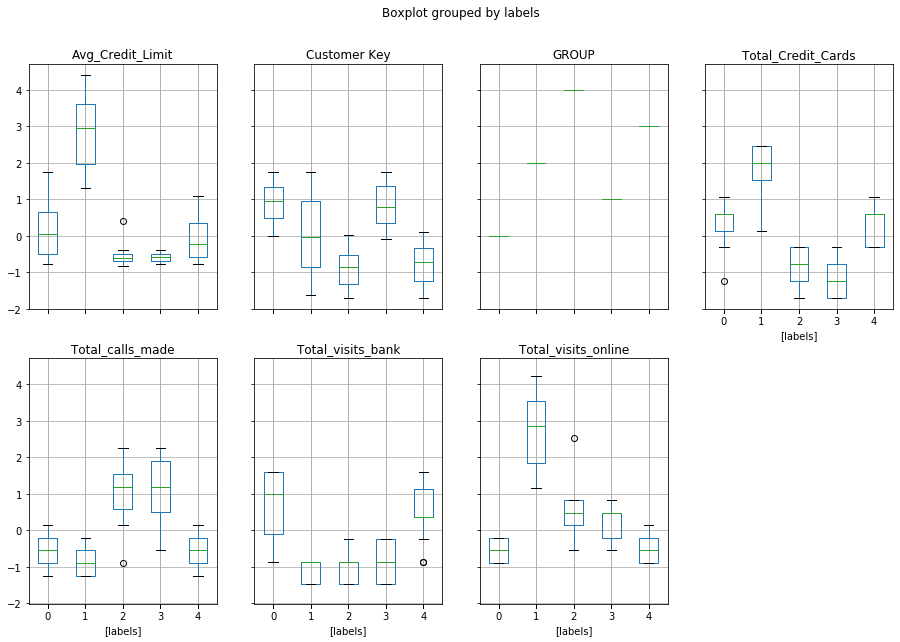

In [139]:
bankscaled.boxplot(by='labels', layout = (2,4),figsize=(15,10))

It can be seen that the avg.credit card limit and Total credit cards is highest for group 2(1),and lowest for group 3&4.
Lowest no. of calls are made by group 2, and highest no. made by 3&4.
Group 1 have made highest no. of bank visits and group 2 have made highest number of online visits.
(0,1,2,3,4 corresponds to groups 1,2,3,4,5 in my above explanation)

In [140]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [141]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [142]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(bankscaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(bankscaled))

c

0.9331508473085994

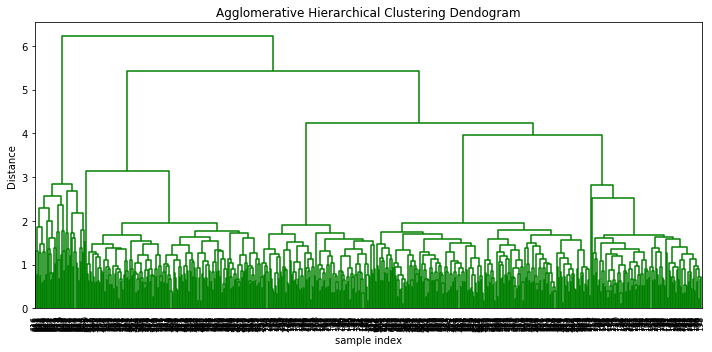

In [143]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [144]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(bankscaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(bankscaled))

c

0.9184041246240591

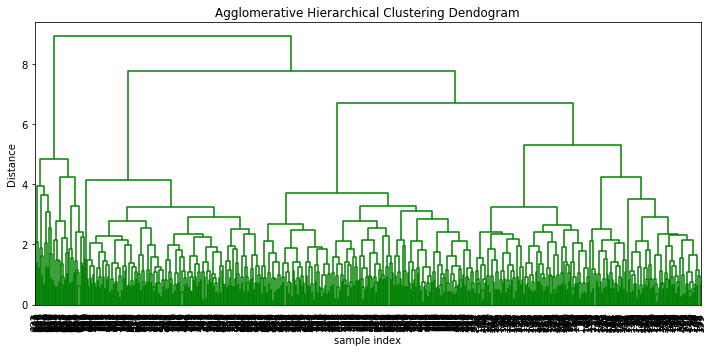

In [145]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [146]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(bankscaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(bankscaled))

c

0.8947266041381657

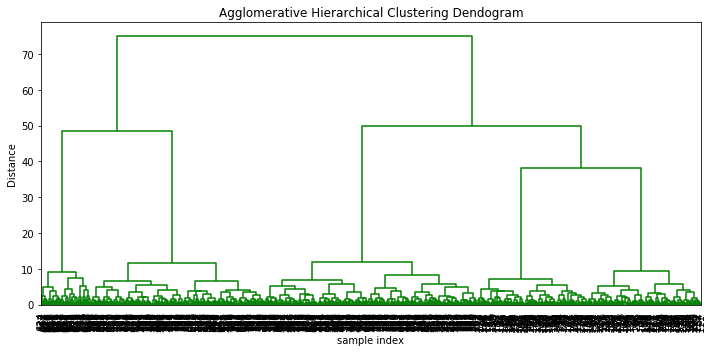

In [147]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

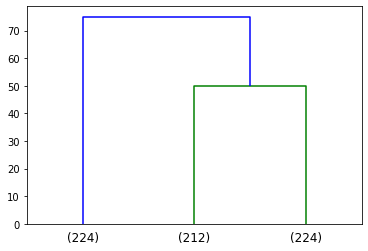

In [148]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [149]:
from array import array 
clusters3_hier= bankscaled['labels']
clusters3_hier.to_numpy()


array([0, 2, 4, 4, 1, 3, 1, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3,
       2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2,
       2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2,
       3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2,
       3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2,
       2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 4, 4, 4, 0, 0, 4, 4, 0, 4, 4, 4, 4, 4, 0,
       4, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 4,
       4, 4, 0, 4, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 4, 0, 4, 4, 0, 4, 0, 0,

#### Avg.Silhoutte Score for hierarchial clustering

In [150]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
score2 = silhouette_score(bankscaled,clusters3_hier)
score2 

0.5786965694995372

#### 6. Compare K-means clusters with Hierarchical clusters

In [151]:
tempResultsDf = pd.DataFrame({'Method':['Heirarchial clustering'], 'score': score2})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,score
0,K-means clustering(k=3),0.441647
0,K-means clustering(k=5),0.493657
0,Heirarchial clustering,0.578697


##### Thus we can see that Hierarchial clustering gives better silhoutte score and thus it is the best approach for clustering in this given dataset.  Average Linkage gives a better cophenetic coeff. followed by complete linkage.

### Key Questions

#### 1. How many different segments of customers are there?

##### There are mainly 3 segments of customers.  

#### 2. How are these segments different from each other?

##### These segments are differents from each other based on their different attributes as given below :

##### Segment 1 - Customers whose average credit card limit is around 12000s. These are the customers with least number of credit cards of around 2-3. They have only made around 1 visit to the bank and around 3-4 online visits. And this segment of customers have made the highest number of calls on an average.

##### Segment 2 - Customers whose average credit card limit is around 30000s. These are the customers with credit cards in the range of 5-6. They have only around 3-4 visits to the bank and only 1 online visit on an avg. And this segment of customers have made only 2 calls on an average.

##### Segment 3 - Customers whose average credit card limit is around 141000s. These are the customers with highest number of credit cards (8-9 on avg). They have rarely made any visits to the bank and seems to have the largest amount of online visits(10-11 on avg). And this segment of customers have made the least number of calls on an average (only 1) .

#### 3. What are your recommendations to the bank on how to better market to and service these customers?

###### It can be seen that segment 1 customers (,i.e., those with lower credit card limits ) need to be more attended to. They have made highest number of calls to the bank which can imply that they have issues to be taken care of with the bank and that their need are not resolved properly. Thus special care needs to be given to segment 1. This trend can be seen clearly as you go down different segments. Segment 3 with highest credi card limit have rarely made any visits to the bank nor have they made much calls to the bank. It seems that their requirements are being met through the online visits to the bank portal.
###### Thus, what I have felt is customers with lower credit card limit should also be given proper services. This can also make them feel more confident to take more credit cards from the bank or to recommend your services to others in the community